In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

rating_data = pd.read_csv('ratings.csv')
rating_data.head()
movie_desc_data = pd.read_csv('movies_desc.csv')
movie_desc_data.head()

combined_data = pd.merge(rating_data,movie_desc_data,on = 'movieId')
combined_data['movieId'].nunique(dropna = True)
combined_data.head()

,user_id,movieId,rating,timestamp,title,genres
0,196,242,3,881250949,Farinelli: il castrato (1994),Drama|Musical
1,63,242,3,875747190,Farinelli: il castrato (1994),Drama|Musical
2,226,242,5,883888671,Farinelli: il castrato (1994),Drama|Musical
3,154,242,3,879138235,Farinelli: il castrato (1994),Drama|Musical
4,306,242,5,876503793,Farinelli: il castrato (1994),Drama|Musical


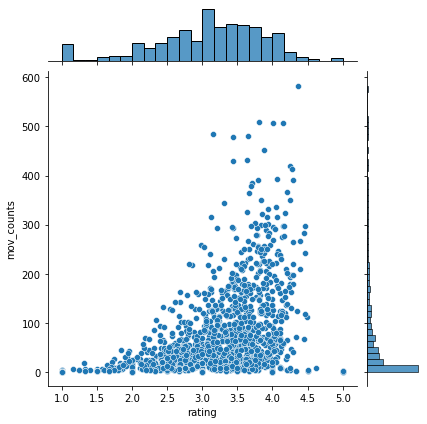

In [3]:
## EDA
combined_data.describe()

# Average rating for all the movies
mov_ratings = pd.DataFrame(combined_data.groupby('title')['rating'].mean())
mov_ratings.head()

# Which movie has been rated how many times

mov_ratings['mov_counts'] = pd.DataFrame(combined_data.groupby('title')['rating'].count())
mov_ratings.head()

# most rated movies
mov_ratings.sort_values('mov_counts', ascending = False).head(10)

# Vizualize the ratings and counts in a joint plot
sns.jointplot(x = 'rating', y = 'mov_counts', data = mov_ratings)

In [11]:
movie_UIIM =  combined_data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_UIIM.head(10)

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (301/302) (1995)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
user_similarity = movie_UIIM.T.corr()
user_similarity.head()

chosen_user = 8
# Remove the chosen user from the matrix
user_similarity.drop(index = chosen_user, inplace = True)
user_similarity.head(10)

# Lets get similar user to the chosen user
similarity_threshold = 0.9
similar_users = user_similarity[user_similarity[chosen_user]>similarity_threshold][chosen_user].sort_values(ascending=False)
similar_users # 926,396

# List down the movies watched by user 8
movies_by8 = combined_data[combined_data["user_id"] == 8]
movies_by8_list = movies_by8['title'].to_list()
movies_by8_list

# List down the movies watched by user 926
movies_by926 = combined_data[combined_data["user_id"] == 926]
movies_by926_list = movies_by926['title'].to_list()
movies_by926_list

# List those movies not been rated/watched by user 926
[i for i in movies_by8_list if i not in movies_by926_list]

['Circle of Friends (1995)',
 'Brothers McMullen, The (1995)',
 'Fluke (1995)',
 'Mighty Morphin Power Rangers: The Movie (1995)',
 'Death and the Maiden (1994)',
 'Road to Wellville, The (1994)',
 'Two Crimes (Dos crímenes) (1995)',
 'Virtuosity (1995)',
 "It's My Party (1996)",
 'Jury Duty (1995)',
 'In the Bleak Midwinter (1995)',
 'Something to Talk About (1995)',
 'Man of No Importance, A (1994)',
 "Mary Shelley's Frankenstein (Frankenstein) (1994)",
 'Lord of Illusions (1995)',
 'Juror, The (1996)',
 'Johnny Mnemonic (1995)',
 'Destiny Turns on the Radio (1995)',
 'Operation Dumbo Drop (1995)',
 'Silences of the Palace, The (Saimt el Qusur) (1994)',
 'Bhaji on the Beach (1993)',
 'Sabrina (1995)',
 'Kids of the Round Table (1995)',
 'Nick of Time (1995)',
 'American President, The (1995)',
 "Antonia's Line (Antonia) (1995)",
 'Drop Zone (1994)',
 'Mute Witness (1994)',
 'Living in Oblivion (1995)',
 'Prophecy, The (1995)',
 'Kiss of Death (1995)',
 'Wild Bill (1995)',
 "Carlito's

In [30]:
movies_by926_list

['Queen Margot (Reine Margot, La) (1994)',
 'Swimming with Sharks (1995)',
 'Natural Born Killers (1994)',
 'Forget Paris (1995)',
 'Perez Family, The (1995)',
 'The Glass Shield (1994)',
 'Madness of King George, The (1994)',
 "Kid in King Arthur's Court, A (1995)",
 'Quick and the Dead, The (1995)',
 'Strawberry and Chocolate (Fresa y chocolate) (1993)',
 'Nemesis 2: Nebula (1995)',
 'Specialist, The (1994)',
 "National Lampoon's Senior Trip (1995)",
 'Only You (1994)',
 'Outbreak (1995)',
 'My Crazy Life (Mi vida loca) (1993)',
 'Quiz Show (1994)',
 'Swan Princess, The (1994)',
 'War, The (1994)',
 'Little Princess, A (1995)']

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_cosine = cosine_similarity(movie_UIIM.T.fillna(0))
user_similarity_cosine

array([[1.        , 0.04693233, 0.        , ..., 0.23588491, 0.        ,
        0.0135482 ],
       [0.04693233, 1.        , 0.        , ..., 0.05076833, 0.        ,
        0.04811252],
       [0.        , 0.        , 1.        , ..., 0.02209873, 0.20519567,
        0.        ],
       ...,
       [0.23588491, 0.05076833, 0.02209873, ..., 1.        , 0.02692397,
        0.11129062],
       [0.        , 0.        , 0.20519567, ..., 0.02692397, 1.        ,
        0.        ],
       [0.0135482 , 0.04811252, 0.        , ..., 0.11129062, 0.        ,
        1.        ]])